# Look at TESS FFI manipulation

In [10]:
%matplotlib notebook
import ipympl
import matplotlib.pyplot as plt
import numpy as np

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
#from astropy.wcs import get_in

from reproject import reproject_interp

from PS_image_download import*

In [11]:
path = './Data/tess2018235142941-s0002-1-2-0121-s_ffic.fits'
hdu = fits.open(path)
data = hdu[1].data
tess_header = hdu[1].header
tess_wcs = WCS(tess_header)

In [ ]:
fits.writeto('data/junk.fits', data, tess_header)

<IPython.core.display.Javascript object>


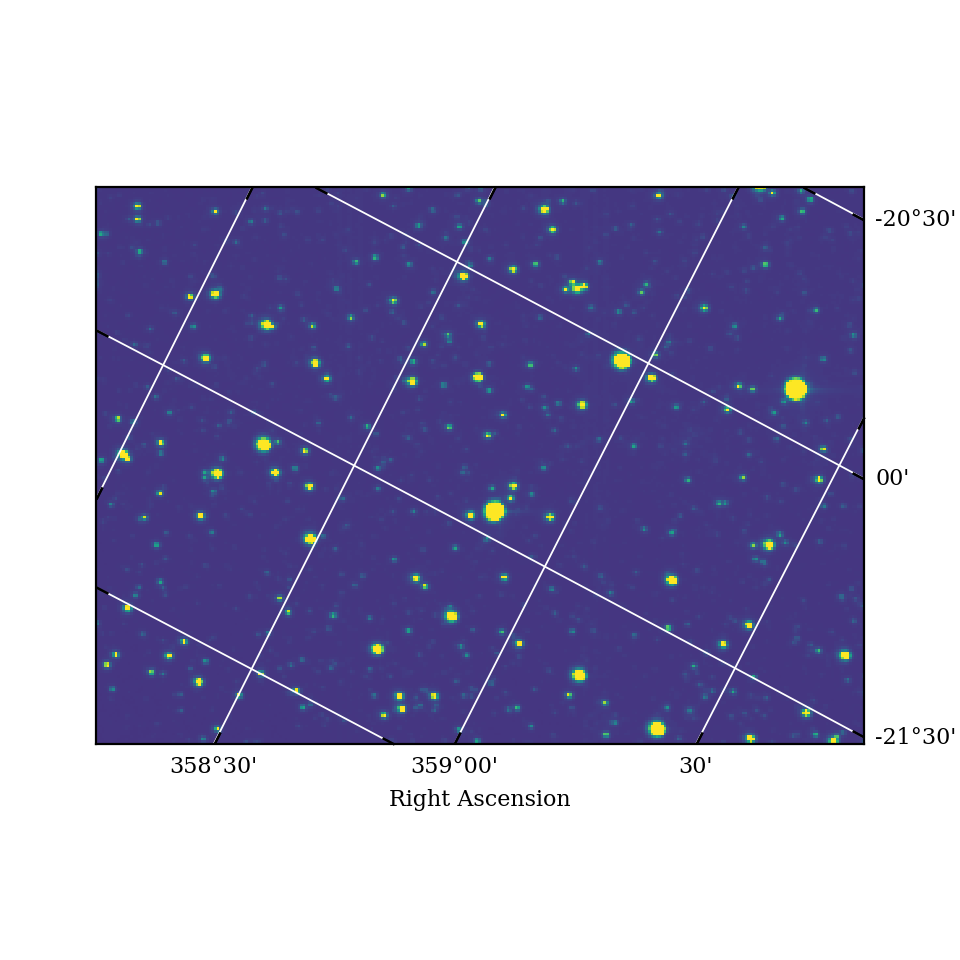

In [12]:
plt.figure()
ax2 = plt.subplot(1,1,1,projection=WCS(hdu[1].header))
plt.imshow(data,origin='lower',vmax=800)

ax2.coords.grid(color='white')
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')

In [7]:
path = './Data/PStest.fits'
ps_hdu = fits.open(path)
ps_data = ps_hdu[1].data
ps_header = ps_hdu[1].header
ps_wcs = WCS(ps_header)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [8]:
ps_wcs

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 0.0  -25.9999999999992  
CRPIX : 6016.5  -11329.5  
PC1_1 PC1_2  : -1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 6.94444461259988e-05  6.94444461259988e-05  
NAXIS : 6255  6265

In [9]:
WCS.

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 1.2049088954883924  -26.0576271210793  
CRPIX : 1045.0  1001.0  
CD1_1 CD1_2  : 0.004994597158881548  -0.002654102364745  
CD2_1 CD2_2  : 0.002780210987902541  0.005056177352553207  
NAXIS : 2136  2078

In [71]:
ps_header

SIMPLE  =                    T / Uncompressed file's conforms to FITS           
BITPIX  =                  -32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 6255 / length of original image axis                  
NAXIS2  =                 6265 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =                   0.                                                  
CRVAL2  =    -25.9999999999992                                                  
CRPIX1  =               6016

In [10]:
array, footprint = reproject_interp(ps_hdu[1], tess_header)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


In [82]:
tess_header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 1.2 cal' / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

In [85]:
targ_head = ps_header.copy()

In [86]:
targs = ['RADESYS', 'EQUINOX', 'CTYPE1', 'CTYPE2', 'CRVAL1', 'CRVAL2', 'CD1_1','CD1_2', 'CD2_1', 'CD2_2']
for card in targs:
    targ_head[card] = tess_header[card]

In [97]:
WCS(tess_header)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 1.2049088954883924  -26.0576271210793  
CRPIX : 1045.0  1001.0  
CD1_1 CD1_2  : 0.004994597158881548  -0.002654102364745  
CD2_1 CD2_2  : 0.002780210987902541  0.005056177352553207  
NAXIS : 2136  2078

In [99]:
0.004994597158881548**2 + 0.002654102364745**2

3.199026014205263e-05

In [98]:
WCS(ps_header)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 0.0  -25.9999999999992  
CRPIX : 6016.5  -11329.5  
PC1_1 PC1_2  : -1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 6.94444461259988e-05  6.94444461259988e-05  
NAXIS : 6255  6265

In [87]:
array, footprint = reproject_interp(ps_hdu[1], targ_head)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


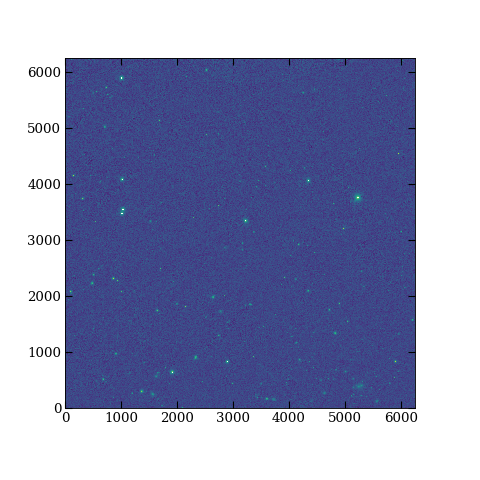

<IPython.core.display.Javascript object>


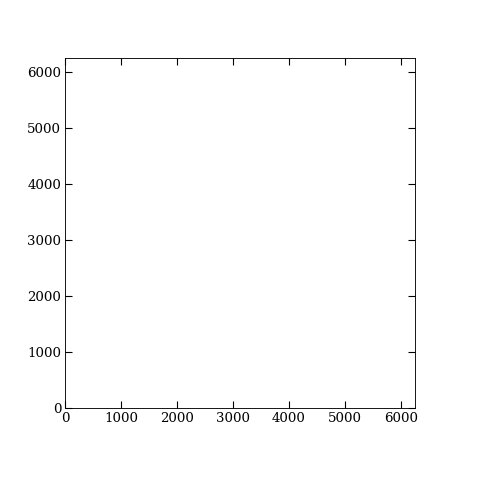

In [88]:
plt.figure()
plt.imshow(ps_data,origin='lower')
plt.figure()
plt.imshow(array,origin='lower')

In [92]:
np.isnan(array).all()

True

In [ ]:
plt.figure()
plt.imshow(array,origin='lower')

In [62]:
test = tess_header.copy()

In [65]:
WCS(test)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN-SIP'  'DEC--TAN-SIP'  
CRVAL : 1.2049088954883924  -26.0576271210793  
CRPIX : 1045.0  1001.0  
CD1_1 CD1_2  : 0.004994597158881548  -0.002654102364745  
CD2_1 CD2_2  : 0.002780210987902541  0.005056177352553207  
NAXIS : 2136  2078

In [63]:
test

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 1.2 cal' / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

In [29]:
ps_header

SIMPLE  =                    T / Uncompressed file's conforms to FITS           
BITPIX  =                  -32 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 6255 / length of original image axis                  
NAXIS2  =                 6265 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =                   0.                                                  
CRVAL2  =    -25.9999999999992                                                  
CRPIX1  =               6016

In [33]:
test['NAXIS1'] = ps_header['NAXIS1']
test['NAXIS2'] = ps_header['NAXIS2']
test['CDELT1'] = ps_header['CDELT1']
test['CDELT2'] = ps_header['CDELT2']

In [34]:
test

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 6255 / length of first array dimension                
NAXIS2  =                 6265 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 1.2 cal' / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


<IPython.core.display.Javascript object>


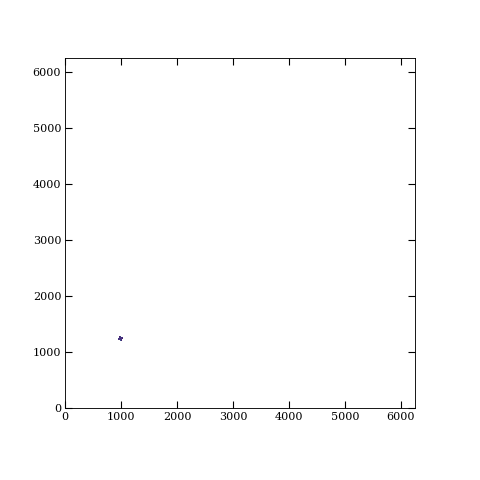

In [35]:
array, footprint = reproject_interp(ps_hdu[1], test)
plt.figure()
plt.imshow(array,origin='lower')

In [31]:
ps_header['CDELT1']

6.94444461259988e-05

In [50]:
from astropy.visualization import PercentileInterval, AsinhStretch

ra = 8
dec = -28
size = 1280

# color image
cim = getcolorim(ra,dec,size=size,filters="riz")

fitsurl = geturl(ra, dec, size=size, filters="i", format="fits")

<IPython.core.display.Javascript object>


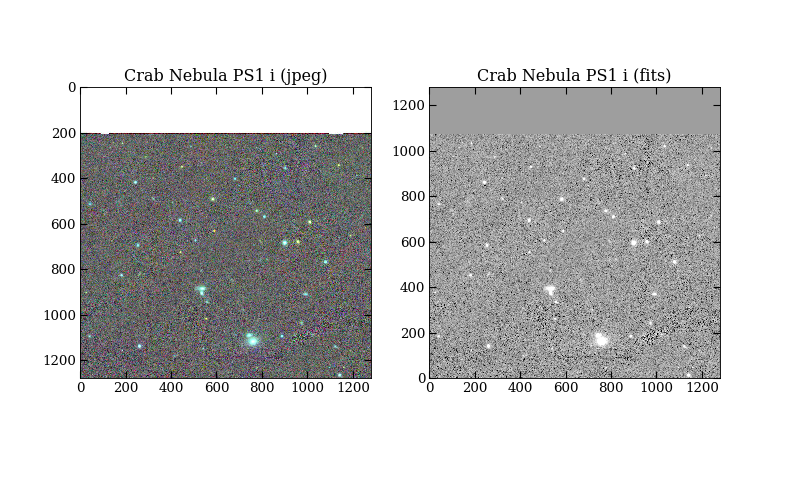

In [61]:
fh = fits.open(fitsurl[0])
fim = fh[0].data
# replace NaN values with zero for display
fim[numpy.isnan(fim)] = 0.0
# set contrast to something reasonable
transform = AsinhStretch() + PercentileInterval(99.5)
bfim = transform(fim)

plt.figure(1,(10,6))
plt.subplot(121)
plt.imshow(cim,origin="upper")
plt.title('Crab Nebula PS1 i (jpeg)')

plt.subplot(122)
plt.title('Crab Nebula PS1 i (fits)')
plt.imshow(bfim,cmap="gray",origin="lower")
plt.show()

In [57]:
fh[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 1280 / length of data axis 1                          
NAXIS2  =                 1280 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
DATE    = '2019-01-25T00:42:21' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
CTYPE1  = 'RA---TAN'                                                            
CTYPE2  = 'DEC--TAN'                                                            
CRVAL1  =      9.1139240264997                                                  
CRVAL2  =     -29.9999999999

In [109]:
ast.wcs.WCS(tess_header).wcs.get_cdelt()

array([1., 1.])

In [101]:
import astropy as ast

In [107]:
ast.wcs.Wcsprm.get_cdelt(tes)

TypeError: expected bytes, Header found

In [113]:
from astropy import wcs
wcs.Wcsprm.get_cdelt(wcs.Wcsprm(tess_header.tostring()))

TypeError: expected bytes, str found

In [6]:
from astropy.io import fits
from astropy import wcs
hdulist = fits.open('./Data/tess2018235142941-s0002-1-2-0121-s_ffic.fits')
header = hdulist[1].header
wcs.Wcsprm.get_cdelt(wcs.Wcsprm(header.tostring()))

TypeError: expected bytes, str found

In [7]:
header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 1.2 cal' / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

In [ ]:
wcs.Wcsprm.get_cdelt(wcs.Wcsprm(header.tostring()))
WARNING: FITSFixedWarning: END
keyrecords following the END keyrecord were ignored. [unknown]
Out[42]: array([1., 1.])